![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---

# Data-X: Machine Learning Model Evaluation -- Regression.

<br>


**Author List (in no particular order):** [Elias Castro Hernandez](https://www.linkedin.com/in/ehcastroh/), [Debbie Yuen](http://www.debbiecyuen.me/), [Arash Nourian](https://www.linkedin.com/in/arashnourian/), and [Ikhlaq Sidhu](https://ikhlaq-sidhu.com/) 

**Video Walkthrough:** To view walkthrough of this notebook, click [here]()

**References and Additional Resources:** See end of this notebook for additional information related to TensorFlow and Keras.

**License Agreement:** Feel free to do whatever you want with this code

___

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="model_thumbnail-01.png" align="center" width="60%" padding="0px"><br>
    <br>
    
</div>

<br>

The **generalization** performance of a learning method is related to its capability (e.g. accuracy) on an independent test data set -- generally called the validation set.  Assessment of this performance is extremely important as it guides the approach to learning, and gives us a measure by which to evaluate and compare models. This module covers key terms, techniques, and metrics used to assess and improve a model’s performance -- with a strong focus on evaluation, as opposed to theory. Moreover, this model will focus on data with a _stationary_ distribution (no additional, 'on-line,' data needing to be considered). If interested on how to assess, improve, and validate non-stationary  machine learning models see [here](https://www.amazon.com/Machine-Learning-Non-Stationary-Environments-Introduction/dp/0262017091).

<br>


<strong style="color:red">KEY CONSIDERATION:</strong> Some of the following content may be written for machines running on Linux or Mac operating systems. If you are working on a Windows machine, you will need to enable the Linux Bash Shell, or adjust Shell commands to PowerShell syntax. A tutorial on how to enable the Linux Bash Shell on Windows 10 can be found [here](https://youtu.be/xzgwDbe7foQ).

___

<br>

**Setup Environment**

In [56]:
# Pyton 2 and 3 support
from __future__ import division, print_function, unicode_literals

# data manipulation
import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as msno

# Machine learning section 1
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

<br>

**Initialize Virtual Environment**

In [57]:
## Create Virtual Environment ##
! python3 -m venv ./venv

In [58]:
## Activate Virtual Environment ##
! . ./venv/bin/activate

___

<br>

## **REGRESSION** MODELS  

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="least_squares_regression.png" align="center" width="40%" padding="10px"><br>

</div>

<br>


We begin our discussion on model evaluation and complexity by examining the topic of [bias-varianced tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) within the context of supervised learning -- in particular using linear methods. Although the following modeling approaches may appear as pendantic, it is our firm belief that understanding complext machine learning topics within the scope of the more interpretable linear models is essential for the same concepts on more advanced more advanced models. Moreover, building models is extraordinarily simple when using packages like ScikitLearn and TensorFlow, while assessing a model and tuning it requires care and proper technique. 

<br>

#### BACKGROUND

___

Suppose $X^T = \left(X_1, X_2, \dots, X_p\right)$ is an input vector and we want to predict some real-valued output $Y$. The [linear regression](https://en.wikipedia.org/wiki/Linear_regression) model 

$$\displaystyle{ g(X) = \beta_0 + \sum_{j=1}^p X_j \beta_j + \epsilon}$$

assumes that the regression function is linear, or that function is sufficiently approximated by the regression function $\displaystyle{E(Y|X)}$. In this model, $X_j~'s$ are variables, which can come from different sources, $\beta_j~'s$ are unknown parameters to be approximated, and $\epsilon$ is zero-mean noise with finite variance that is independent of $x,y$.  Suppose we split our data is sinto training and testing data. The training data $(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)$ is then used to approximate the parameters $\beta_j$. As such, a simple or multiple regression model is essentailly a hypothesis concerning the relationship among the dependent and independent variables. 

A popular approach of estimation is know as the method of [least squares](https://en.wikipedia.org/wiki/Least_squares). In [_least squares_](https://youtu.be/PaFPbb66DxQ?t=13) we pick coefficients $\beta = \left(\beta_0, \beta_1, \dots, \beta_p\right)^T$, in an effort to minimize a metric measuring 'nearness.'

It should be noted that there are more metrics for evaluating regression problems -- depending on input(s), output(s), and data type(s) -- that what is covered on this notebook. For more info, see the resources section at the end of this notebook.

<br>

#### **CASE STUDY:** LINEAR **REGRESSION**

___

<br>

**About Data:** [Forest Fires Data Set](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

For more information, read Cortez and Morais, 2007.

In [59]:
# get data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
data = pd.read_csv(url)
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<br>

**Clean Data**

In [60]:
# one hot encode categorical features
df = pd.get_dummies(data)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


___

**Consider:** We just converted all the categorical variables to [one-hot](https://en.wikipedia.org/wiki/One-hot) encoding. What should be ringing alarm bells? Is that a pun?

One hot encoding features are mutually exclusive. For days of the week, only one entry per column can be 1 and all the rest are 0s. So what's the problem? For one, weeks by convention start on Sunday, and we have features from Sunday through Saturday -- meaning that the encoding for Saturday is implicitly there when $Sunday=0, Monday=0, \dots, Friday=0$. 

To prevent [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) -- e.g. Saturday can be linearly predicted from the other days of the week -- we must drop one column from month and one from day -- it does not matter which month or day we choose.

___

In [61]:
# drop last month in year and last day in week
df.drop(labels=['month_dec', 'day_sat'], axis=1, inplace=True)

In [62]:
# check data ranges
print(df.max() - df.min())

X               8.00
Y               7.00
FFMC           77.50
DMC           290.20
DC            852.70
ISI            56.10
temp           31.10
RH             85.00
wind            9.00
rain            6.40
area         1090.84
month_apr       1.00
month_aug       1.00
month_feb       1.00
month_jan       1.00
month_jul       1.00
month_jun       1.00
month_mar       1.00
month_may       1.00
month_nov       1.00
month_oct       1.00
month_sep       1.00
day_fri         1.00
day_mon         1.00
day_sun         1.00
day_thu         1.00
day_tue         1.00
day_wed         1.00
dtype: float64


___

**Note:** The range in values for some features are orders of magnitude larger than others -- e.g. `area`. Generally we want to scale our data so that the range of values in each feature is roghly the same. This is particularly important when using [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) or [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). Two common ways of scaling data are [normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) and [standardization](https://en.wikipedia.org/wiki/Feature_scaling)

To gain insight as to what our model is telling us, we will skip data scaling for now.
    
___

<br>

**Fit Model**

In [63]:
# copy data to prevent pass by reference issues
data = df.copy()

# remove dependent variable
target = data.pop('area')

# fit model, with sklearn picking best intercept
lr = LinearRegression(fit_intercept=True)
lr.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<br>

**Evaluate Model**

From the discussion below on metrics for evaluation regression models, we know that for our purposes $R^2$ and $RMSE$ will provide the most relevant information regarding our model's fit.

In [76]:
# root mean squared error
predictions = lr.predict(data)
mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)
print("RMSE = ", rmse)

# coefficient of determination using r2 built into lr
r2 = lr.score(data, target)
print("R^2 = ", r2)

# Out of Sample R^2 using r2_score method
osr2 = r2_score(target, predictions)
print("OSR^2 = ", osr2)

RMSE =  62.12143311792724
R^2 =  0.04578209650808529
OSR^2 =  0.04578209650808529


___

**Interpretating Coefficient of Determination** 

Recall that [$R^2$](https://youtu.be/2AQKmw14mHM) is a metric of correlation between variables. In the above case, $R^2$ is essentially zero 

$$R^2 = 0.0458 \Rightarrow R = \sqrt{0.0458} = 0.21400$$

From $R^2$ we see that rougly 5 percent of the variation in the data is explained by the current features and such we can deduce that there is essentially no linear relationship present between the features and the dependent variable.  However, our intuition and general knowledge should tell us that temperature and seasonality appears to be correlated with the likelihood of fires. From the discussion on metrics we know that $R^2$ is sensitive to outliers, so we should check for [data imbalance](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/) and skewedness to see if we can explain and correct for the lack of correlation. We may also want to check for the [variance inflation factors](https://en.wikipedia.org/wiki/Variance_inflation_factor), which measures the relative variance of a predictor relative to all of the predictors.

___

<AxesSubplot:>

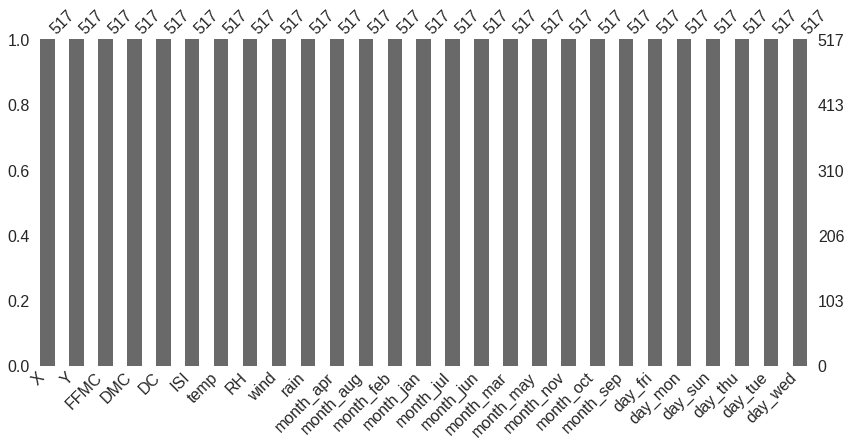

In [77]:
# check for missing data: white space in bar indicates missing values.
msno.bar(data, figsize=(14,6))

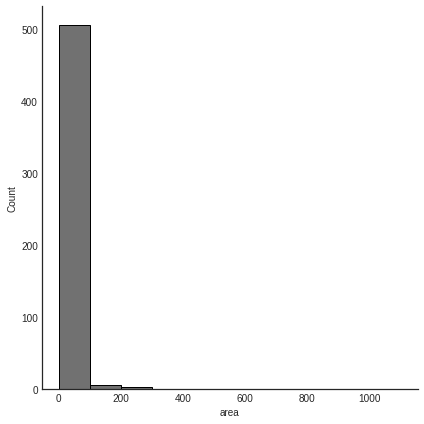

In [78]:
# visualize dependent variable
sns.displot(target, height=6, binwidth=100, color='#424242')

___

**Discussion:** As you can see, the response variable with highly skewed -- meanwhile [Least Squares Regression](https://en.wikipedia.org/wiki/Least_squares) assumes a normal distribution. Two straightforward ways for dealing with the imbalance are [resampling](https://machinelearningmastery.com/statistical-sampling-and-resampling/) and model selection. Sometimes, as an initial step, we can play with the training/test split to deal skewdness. This is because:

>* A **larger test set** gives a more reliable estimate of accuracy -- i.e. higher bias, lower variance.
>* A **larger training set** will lead to a more representative model -- but with poor generaliztions, i.e. higher out-of-sample variance.
___

<br>

#### BASELINE MODEL

<br>

**Playing with Train/Test Split**

In [79]:
from sklearn.model_selection import train_test_split

# 50/50 split used to establish baseline
X_train, X_test, y_train, y_test = train_test_split(data, target, shuffle=True,
                                                    test_size=0.5, random_state=290)

<br>

**Fit Model on Training Data**

In [80]:
lr_2 = LinearRegression(fit_intercept=True)
lr_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<br>

**Check in/out-of-sample error**

In [81]:
def inSampleError(X_train, y_train, model):
    '''
        Computes in-sample-R^2 and RMSE. 
        @param X_train <type:DataFrame>
        @param y_train <type:DataFrame>
        @model <type:sklearn.linear_model>
        @returns R2 <type:float> 
        @returns rmse <type:float>
    '''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return(model.score(X_train, y_train), rmse)
    
def outSampleError(X_test, y_test, model):
    '''
        Computes out-of-sample-R^2 and RMSE. 
        @param X_test <type:DataFrame>
        @param y_test <type:DataFrame>
        @model <type:sklearn.linear_model>
        @returns R2 <type:float> 
        @returns rmse <type:float>
    '''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return(model.score(X_test, y_test), rmse)

In [82]:
# calculate in-sample error metrics
is_r2, is_error = inSampleError(X_train, y_train, lr_2)

In [83]:
# calculate out-of-sample error metrics
os_r2, os_error = outSampleError(X_test, y_test, lr_2)

In [84]:
print("R^2_in = ", is_r2)
print("R^2_out = ", os_r2, "\n")
print("rmse_in = ", is_error)
print("rmse_out = ", os_error)

R^2_in =  0.07625005249125671
R^2_out =  -0.1210187605707067 

rmse_in =  69.32739834458923
rmse_out =  56.91710873036987


___

**Discussion:** Notice that $R^2_{in}$ is still pretty low. However, now we see that $R^2_{out}$ is lower that $R^2_{in}$ and also negative. Meanwhile, we see that $RMSE_{out}$ is higher that $RMSE_{in}$, which tells us that our model is [overfitting](https://elitedatascience.com/overfitting-in-machine-learning) the data -- keep in mind that the greater the gap between $RMSE_{in}$ and $RMSE_{out}$, the more the model overfits/underfits.  

Since we know our model is overfitting, we can test different splits or use resampling to see if we can improve the model. Alternatively, we can leverage [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) to find the penalty for some desireable [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) procedure(s) and thus find the best [tradeoff between bias and variance](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). More on those topics below.

___

<br>

#### **MODEL** TUNING

In [85]:
# common 80/20 split on the data (train/test)
X_train, X_test, y_train, y_test = train_test_split(data, target, shuffle=True,
                                                    test_size=0.2, random_state=290)

<br>

**Helper Function(s)**

Detailed description and source of helper functions can be found [here](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/).



In [86]:
def trainingError(X_train, y_train, model):
    '''returns in-sample root mean squared error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return(rmse)
    
def validationError(X_test, y_test, model):
    '''returns out-of-sample root mean squared error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return(rmse)

def errorMetrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = trainingError(X_train, y_train, model)
    validation_error = validationError(X_test, y_test, model)
    return (train_error, validation_error)

___

#### **BIAS-VARIANCE** TRADEOFF


<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="bias_v_variance.png" align="center" width="40%" padding="10px"><br>
    <br>
</div>

<br>


We now take some time to highlight some of the key concepts in [bias](https://en.wikipedia.org/wiki/Bias_(statistics)), [variance](https://en.wikipedia.org/wiki/Variance), and [reducible/irreducible error](https://daviddalpiaz.github.io/r4sl/biasvariance-tradeoff.html).

<br>

Consider the previous functions. `errorMetrics( )` returns `train_error` and `validation_error`. Each error can be broken down into three components. Namely,

<br>

$$\displaystyle{Total~Error~(model) = Variance~(model) + Bias~(model) + Variance~(irreducible ~error)}$$

<br>

**BIAS** is a measure of how closely the functional form of the model captures the true relationship (i.e. the mapping function) between the independent (input) and dependent (output) variables. A model with high bias, which is **always positive**, is beneficial when the model matches the true underlying mapping function. However, large bias translates to poor [generalization](https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/readings/L09%20Generalization.pdf) of the model. Following are some ways to detect and deal with bias. 

>* **High Bias (source of error)** - will have a high training error. Validation error is similar in magnitude to training error.
>> **Solution:** increasing the number of features, changing the model to one that can more closely represent the complexity of the relationship, and resampling techiniques -- such as [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) and [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) -- are all approaches for reducing bias.




<br>

**VARIANCE** is the amount by which the model's performace changes when it is estimated (fit) on a different training data set. Variance is also always a **positive value**. Following are some ways to detect and deal with variance.

>* **High Variance (source of error)** - will have a low training error, and very high validation error.
>> **Solution:** [feature selection](https://en.wikipedia.org/wiki/Feature_selection), and [regularization](https://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf) are two common approaches.




<br>

**ERROR** consists of both reducible and irreducible error(s) -- also known as [noise](https://people.eecs.berkeley.edu/~jrs/189/lec/12.pdf). The **reducible error** is a quantity that can be modulated during learning. Meanwhile, [irreducible error (Bayes Error Rate)](https://en.wikipedia.org/wiki/Bayes_error_rate) is the error caused by elements outside of modulation -- such as noise in the observations. Irreducible error serves as an, almost always, unknown bound on the accuracy of our prediction for the dependent variable(s). 


>* **Reducible Error (source of error)** - reducible error can be decomposed into **error due to squared bias** and **error due to variance**. 
>> **Solution 1:** since the portion of the reducible error due to squared bias has to do with the difference between predicted and true target values, techniques for dealing with high bias, such as [resampling](http://www.columbia.edu/~mh2078/MachineLearningORFE/ResamplingMethods.pdf), can influence this type of error while also decreasing model underfit.<br>
>> **Solution 2:** on the other hand, the error due to variance is the amount by which the models predictions differ from one training set to the expected predicted values over all training sets, techniques for dealing with high variance -- such as [regularization](https://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf) -- can be used to reduce this error while also redusing overfit.





<br>

#### **BIAS-VARIANCE** DECOMPOSITION


To gain a deeper understanding of what sort of insights we can gain from total error, let us decompose the bias-variance relationship.

From the above explanation we have that there are three sources of error. To derrive total error, let the inability of a hypothesis $h$ to fit $g$ be defined as the bias. Variance is then the error due to fitting noise in the data. Let our model then be

$$\displaystyle{X_i \sim D, ~ \epsilon_i \sim D^{\prime}, ~ y_i = g(X_i) + \epsilon_i}$$

where $h$ is a random variable, $\epsilon_i \sim D^{\prime}$ has mean zero, and the sample points $X_i \sim D$ come from an unknown probability distribution. 

We want to fit our hypothesis $h$ to $X,y$. Consider an arbitrary point $z \in \mathbb{R}^d$ (not necessarly a sample point) and suppose <br>

$$\displaystyle{\gamma = g(z) + \epsilon, ~~~~ \epsilon \in D^{\prime}}$$

For an arbitrary $z$ and $\gamma$ random, the mean comes from $g$ and variance from $\epsilon$ since <br>

$$\displaystyle{E[\gamma] = g(z);~~~~Var(\gamma) = Var(\epsilon)}$$

Then for a risk function $R$ we have that when loss, $L$ equal to the square error

$$\displaystyle{ R(h) = D[L(h(z), \gamma)]}$$

we have form some $h$, a random variable, when we integrage the loss over all possible values for weights, subject to the training data

$$\displaystyle{R(h) = E[(h(z) - \gamma)^2] = E[h(z)^2] + E[\gamma ^2] - 2E[\gamma ~h(z)]}$$

Note that $\gamma$ and $h(z)$ are independent. Then

$$\displaystyle{R(h) = Var(h(z)) + E[h(z)]^2 + Var(\gamma) + E[\gamma]^2 -2E[\gamma]E[h(z)] }$$

and thus 

$$\displaystyle{R(h) = \left(E[h(z)]-E[\gamma] \right)^2 + Var(h(z)) + Var(\gamma)  = \left(E[h(z)] - g(z)\right)^2 + Var(h(z)) + Var(\epsilon) }$$

<br>

The above is known as the *bias-variance decomposition of the risk function*

$$\displaystyle{R(h) = Bias^2_{method} + Var_{method} + Var_{irreducible~error}}$$




<br>

<br>

To drive the point home, consider the following illistration of a bias-variance decomposition:
<br>


<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="bias-variance_decomposition.png" align="center" width="50%" padding="0px"><br>
    <br>
    50 fits of $g$ (20 samples each)
</div>


<br>

#### **CONSEQUENCES** OF **BIAS-VARIANCE** DECOMPOSITION


<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="validation_decision_curves.png" align="center" width="90%" padding="0px"><br>
    <br>
</div>

<br>


>* Ideally we want a model that has low bias and low variance -- the point where total error is minimized. This can be a very challenging task.<br>
>* Underfitting $\Leftrightarrow$ high bias<br>
>* Overfitting $\Leftrightarrow$ high variance.<br>
>* Training error reflects bias but not variance.<br>
>* Test error reflects both bias and variance. A reason why low training error can be obfuscate overfitting.<br>
>* For many distributions, $Variance \rightarrow 0$ as $n \rightarrow \infty$.<br>
>* If $h$ can fit $g$ exactly, then for many distributions $Bias \rightarrow 0$ as $n\rightarrow \infty$.<br>
>* If $h$ fits $g$ poorly, then bias is large at "most" points.<br> 
>* Adding a good feature reduces bias; addiging a bad feature rarely increases it.<br>
>* Adding a feature usually increases variance. As such, only add a feature if it reduces bias more than it increases variance.<br>
>* Irreducible error cannot be reduced (mind blown).<br>
>* Noise in a test set only affects $Var(\epsilon)$.<br>
>* Noise in a training set affects $Bias$ and $Var$  but not the error, $Var(\epsilon)$.<br>
>* Simple models such as linear and logistic regression, generally have a high bias and low variance.<br>
>* Complex models, such as random forrests, tend to have low bias but high variance.<br>
>* High bias/variance is not necesseraly a bad thing. Careful consideration should be given to the problem being addressed.<br>

___

In [87]:
lr_3 = LinearRegression(fit_intercept=True)

# calculate error metrics
train_error, test_error = errorMetrics(X_train, y_train, X_test, y_test, lr_3)

# training and testing error to three significant figures
print('ORIGINAL ERROR')
print('-' * 50)
print('training error: {:.3f} | testing error: {:.3f}'.format(float(train_error), float(test_error)))

# test/train ratio as a percentage
print('test/train: {:.1%}'.format(test_error/train_error))

ORIGINAL ERROR
--------------------------------------------------
training error: 66.783 | testing error: 40.049
test/train: 60.0%


___

**Note:** if $\frac{test}{train} \le 100\%$ we may be underfitting, while $\frac{test}{train} > 100\%$ may indicate overfitting.<br>

<br>

> **Underfitting** occurs when the training and validation errors are both substantial, but there also exists a small gap between them. If the model cannot reduce the training error, then the model may be too simple to capture the underlying distribution.<br>
> **Overfitting** occurs when our model follows the training data more closely than the underlying, actual, distribution.  [Regularization](https://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf) is a collection of techniques used to combat [overfitting](https://en.wikipedia.org/wiki/Overfitting).<br>

___

<br>

#### **MODEL** TUNING (CONTINUED)

In the previous comparison between testing and training errors, we appear to be underfitting. However, the model was trained using a test/train split. To see how splitting the data can influence we now turn to a **Training | Validation | Testing** data split approach. However, it should be noted that there are a few drawbacks to splitting a data set in such a way. Namely:

1. Data is generally scarce, and splitting the data further can lead to detrimental expectations.
2. The performance on the validation set may be highly variable, dpending on how the data is split.
3. The error in the validation set tends to over-estimate the test-error rate of the model fitted to the entire data set.

Despite the aforementioned drawback, we now perform such as split to establish a baseline prior to discussing regularization and shrinkage methods.

In [88]:
# now we want to split the same data into training, testing, validation 
# This is done so that we have 'unseen' data to use when we compute out-of-sample error
# we do this in three steps:
 
# (1) split to original data into train/test (80/20)
X_intermediate, X_test, y_intermediate, y_test = train_test_split(data,
                                                                  target,
                                                                  shuffle=True,
                                                                  test_size=0.2,
                                                                  random_state=290)

# (2) then split train again into train/validation (75/25)
X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate,
                                                                y_intermediate,
                                                                shuffle=False,
                                                                test_size=0.25,
                                                                random_state=290)

# (3) delete intermediate variables (optional)
#del X_intermediate, y_intermediate

# proportions
print('training set: {}% | validation set: {}% | testing set {}%'.format(round(len(y_train)/len(target),2),
                                                                         round(len(y_validation)/len(target),2),
                                                                         round(len(y_test)/len(target),2)))

training set: 0.6% | validation set: 0.2% | testing set 0.2%


In [89]:
# calculate error metrics on train/validate
train_error, validation_error = errorMetrics(X_train, y_train, X_validation, y_validation, lr_3)

# training and testing error to three significant figures
print('ORIGINAL ERROR')
print('-' * 50)
print('training error: {:.3f} | validation error: {:.3f}'.format(float(train_error), float(validation_error)))

# test/train ratio as a percentage
print('validation/train: {:.1%}'.format(test_error/train_error))

ORIGINAL ERROR
--------------------------------------------------
training error: 45.877 | validation error: 109.485
validation/train: 87.3%


___

**Discussion:** 

After reducing the amount of data available for training our model appears to be overfitting. Recall that in our new data split approach our initial data split yielded the training/test sets, then the resulting training data was subsequently split into the training/validation sets. Since we appear to be overfitting, there are several approaches we can take to reduce our validation error, and thus reduce variance and in turn decrease the overfit. One approach could be to reduce the number of features, but this task should be generally avoided as a first option or dismissed altogether -- for more details see the optional section on p-valies and variance inflation factors (vif) at the end of this notebook. 

Consider the following diagram:

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="modulating_bias-variance.png" align="center" width="40%" padding="0px"><br>
    <br>
</div>

<br>

Since we cannont gather more data (total amount as opposed to split amounts), and we are ignoring the removing of features, we now turn our attention toward **resampling** and **regularization** methods. 


**Note:** techniques such as [subset selection](https://en.wikipedia.org/wiki/Feature_selection#Subset_selection), [Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) and [Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) can be used to deal with overfitting, but are not covered in this notebook.

___

<br>

#### **RESAMPLING** METHODS

<br>

Resampling methods involve the process of (1) repeatedly drawing samples from the training data, (2) refitting the model of interest with each new sample, and (3) examining all of the fitted models to draw conclusions.  There are several approaches to resampling, however on this notebook we will focus on **cross validation**. For a comprehensive list of resampling methods with associated python examples, see [here](https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html).

<br>

**CROSS VALIDATION** (AND HYPER PARAMETER TUNNING)

To first build some intuition, consider the original data split (train/test) we performed at the start of this notebook. We took the data set and essentially performed a **2-fold cross-validation (hold-out-method)** when we split it into $training ~|~ validation ~|~ testing$ sets. A disadvantage to such approach is that the model's performance strongly depends on how the data is split, as well as the random seed used.

<br>

**Why Cross-Validation**

In [90]:
# 80/20 split - data drawn sequentially
X_train_1a, X_validation_1a, y_train_1a, y_validation_1a = train_test_split(X_intermediate,
                                                                            y_intermediate,
                                                                            shuffle=False,
                                                                            test_size=0.20,
                                                                            random_state=290)

# 80/20 split - data suffled prior to drawing 
X_train_1b, X_validation_1b, y_train_1b, y_validation_1b = train_test_split(X_intermediate,
                                                                            y_intermediate,
                                                                            shuffle=True,
                                                                            test_size=0.20,
                                                                            random_state=290)

# 85/15 split - data drawn sequentially
X_train_2a, X_validation_2a, y_train_2a, y_validation_2a = train_test_split(X_intermediate,
                                                                            y_intermediate,
                                                                            shuffle=False,
                                                                            test_size=0.15,
                                                                            random_state=290)

# 90/10 split - data suffled prior to drawing 
X_train_3a, X_validation_3a, y_train_3a, y_validation_3a = train_test_split(X_intermediate,
                                                                            y_intermediate,
                                                                            shuffle=True,
                                                                            test_size=0.10,
                                                                            random_state=290)

In [91]:
# calculate error metrics on train/validate
train_error_1a, validation_error_1a = errorMetrics(X_train_1a, y_train_1a, X_validation_1a, y_validation_1a, lr_3)
train_error_1b, validation_error_1b = errorMetrics(X_train_1b, y_train_1b, X_validation_1b, y_validation_1b, lr_3)
train_error_2a, validation_error_2a = errorMetrics(X_train_2a, y_train_2a, X_validation_2a, y_validation_2a, lr_3)
train_error_3a, validation_error_3a = errorMetrics(X_train_3a, y_train_3a, X_validation_3a, y_validation_3a, lr_3)

# training and testing error to three significant figures
print('\n\nERROR SENSITIVITY TO TRAIN|VALIDATE SPLIT')
print('-' * 70)
print('80/20 split - data drawn sequentially: \n\t    training error: {:.3f} | validation error: {:.3f}\n'.format(float(train_error_1a), float(validation_error_1a)))
print('80/20 split - data suffled prior to drawing:  \n\t    training error: {:.3f} | validation error: {:.3f}\n'.format(float(train_error_1b), float(validation_error_1b)))
print('85/15 split - data drawn sequentially: \n\t    training error: {:.3f} | validation error: {:.3f}\n'.format(float(train_error_2a), float(validation_error_2a)))
print('90/10 split - data suffled prior to drawing: \n\t    training error: {:.3f} | validation error: {:.3f}\n'.format(float(train_error_3a), float(validation_error_3a)))



ERROR SENSITIVITY TO TRAIN|VALIDATE SPLIT
----------------------------------------------------------------------
80/20 split - data drawn sequentially: 
	    training error: 72.789 | validation error: 37.049

80/20 split - data suffled prior to drawing:  
	    training error: 73.903 | validation error: 24.114

85/15 split - data drawn sequentially: 
	    training error: 71.389 | validation error: 32.677

90/10 split - data suffled prior to drawing: 
	    training error: 70.127 | validation error: 21.160



___

**Discussion:**

Note the disparities in validation error in response to 5 percent change in the amount of available data for the training set. Cross-validation gives a way to deal with such disparities in our model's fit brough about by how we perform our data splits. Cross-validation is also used for:
1. Picking which variables to include in a model (**feature selection**).
2. Picking the prediction function to use based on error (**model assessment**).
3. Picicking the parameters in the prediction function (e.g. hyperparameter tunning).
4. Compare different predictors (**model selection**).

While [Bootstrapping & Permutation Resampling](https://statweb.stanford.edu/~tibs/stat315a/Supplements/bootstrap.pdf) techniques have several benefits, for brevity we will focus entireley on cross-validation in this notebook -- in particular, **K-fold Cross-validation**. For a comprehensive explanation of how resampling affects accuracy and model selection, see [this](http://ai.stanford.edu/~ronnyk/accEst.pdf) research paper comparing different approaches.

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="5-fold_cross-validation.png" align="center" width="40%" padding="0px"><br>
    <br>
    Example Process for Fitting Model Using 5-Fold Cross-Validation
</div>

<br>

___

<br>

**Computing Cross-Validation Scores Using $R^2$**

Prior to examing cross-validation with regularization, we first want to establish a baseline. To understand what is going on in the background, we will first compute the cross-validation scores using [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and the using [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) from the ScikitLearn library. 

In [315]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# 80/20 split on the data (train/test) with suffling
X_train, X_test, y_train, y_test = train_test_split(data, target, shuffle=True,
                                                    test_size=0.2, random_state=135)

# new linear model for clarity
lm_4 = LinearRegression(fit_intercept=True)

# 5-fold cross-validation with R^2 scores using cross_val_score
scores_cvs = cross_val_score(lm_4, X_train, y_train, scoring='r2', cv=5)
print("\nCV (cross_val_score) scores: \n\t", scores_cvs)

# 5-fold cross-validation with R^2 scores using KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 135)
scores_KF = cross_val_score(lm_4, X_train, y_train, scoring='r2', cv=folds)
print("\nCV (Kfold) scores: \n\t", scores_KF)


CV (cross_val_score) scores: 
	 [-1.69652627e-02 -3.65222361e-01 -4.99759126e-01  6.53620680e-04
 -7.94678968e+00]

CV (Kfold) scores: 
	 [-0.01104697 -0.95436741 -0.43480365 -0.28099057 -0.50994686]


___

**Note:** [work by Ron Kohave](http://ai.stanford.edu/~ronnyk/accEst.pdf) showed that for practical data (not skewed, inballanced, etc.), **10-fold corss-validation consistently leads to the best compromise between bias and variance** in most cases. 
    
___

<br>

**Compute Best CV Score Using $-MSE$ on 10 CV fold**

In [316]:
# iterate over various thresholds
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

scores_neg_MSE = -cross_val_score(lm_4, X_train, y_train, scoring='neg_mean_squared_error', cv=10)


In [317]:
print(scores_neg_MSE)
print("\n", min(scores_neg_MSE))

[ 1607.24767594 16096.82918195  1208.53995124   806.0764834
   703.07870949  1257.99430898   479.88167429 28184.91198337
   470.78656901   609.42573622]

 470.78656900933606


<br>

___


#### **LEARNING** CURVES

<table style="width:80%">
  <!-- left column -->
  <th>
      <div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
          <img src="validation_curve.png" align="center" width="70%" padding="0px"><br>
      </div>
  </th>
  <!-- right column -->  
  <th>
      <div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
          <img src="learning_curve.png" align="center" width="70%" padding="0px"><br>
      </div>
  </th>
</table>

<br>

We are starting to glimpse the power of cross-validation, in particular when it comes to hyperparameter optimization, and model selection.  We now take a brief aside to discuss the [diagnostic power of learning curves](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/). Despite the image, it should be noted that will not be covering validation curves (e.g. F-Measure Curve, ROC, etc.) in this notebook as they are most commonly used for classification. You should still make note of it, as it may be needed for your homework problems.

**Learning Curves with High Bias**

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
  <img src="learning_curve_bias.png" align="center" width="20%" padding="0px"><br>
</div>

      
>* Getting more training data may not, by itself, help much.<br>
>* Learning curves will be **characterized by a small gap between curves, but both trending well above or bellow the desired accuracy**.<br>
>* Will lead to **model underfitting**.<br>
>* May be indicative of [systemic error](https://sciencing.com/difference-between-systematic-random-errors-8254711.html).<br>
>* Adding polynomial features ($x_1, x_2, x_1^2, x_2^2, \dots$) will reduce bias/underfit.<br>
>* Adding additional features will reduce bias/underfit.<br>
>* Loosening regularization will reduce bias/underfit.

<br>

**Learning Curves with High Variance**

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
  <img src="learning_curve_variance.png" align="center" width="20%" padding="0px"><br>
</div>

      
>* Getting more training data will likely help.<br>
>* Learning curves will be **characterized by a wide gap between the two errors**.<br>
>* Will lead to **model overfitting**.<br>
>* Removing features will reduce variance/overfit.<br>
>* Increasing regularization will reduce variance/overfit.

___

<br>

**Visualizing Learning Curves**

In [318]:
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores  = learning_curve(lm_4, 
                                                         data, 
                                                         target, 
                                                         # Number of folds in cross-validation
                                                         cv=10,
                                                         # Evaluation metric
                                                         scoring='neg_mean_absolute_error',
                                                         # Use all computer cores
                                                         n_jobs=-1)

In [319]:
# Create mean and standard deviations of training errors
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create mean and standard deviations of test errors
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

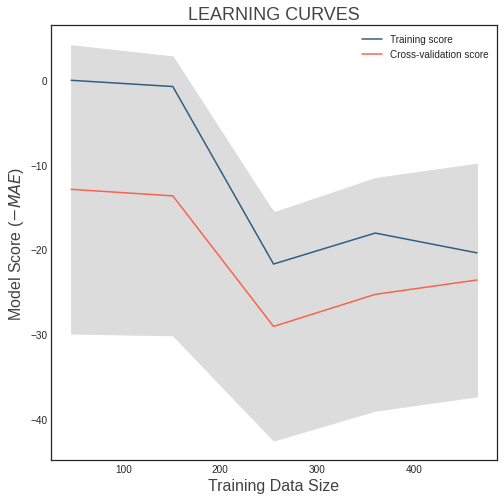

In [320]:
#create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Draw artists (lines)
ax.plot(train_sizes, train_mean, color="#2F5E85",  label="Training score")
ax.plot(train_sizes, test_mean, color="#F9634B", label="Cross-validation score")

# draw accuracy bands
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="gray")
ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="gainsboro")

# header
ax.set_title("LEARNING CURVES", size=18, color="#434343")
# create artist labels
ax.set_xlabel(r'Training Data Size', size=16, color="#434343")
ax.set_ylabel(r'Model Score ($-MAE$)', size=16, color="#434343")

# legend
plt.legend(loc="best")

plt.show()

<br>

___


#### **SHRINKAGE** METHODS -- **REGRESSION**

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="l1_l2_contour_simple.png" align="center" width="70%" padding="0px"><br>
    <br>
</div>


[Regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) is the purposeful modulation of the bias estimator in an effort to reduce the total error. That is, both L1 and L2 regularization penalize features that contribute little to the objective function's output -- this is known as [shrinkage](https://datacadamia.com/data_mining/shrinkage). There are several ways of performing shrinkage but this notebook will focus exclusively on [Lasso (L1)](https://aswani.ieor.berkeley.edu/teaching/SP15/265/lecture_notes/ieor265_lec6.pdf) and [Ridge (L2)](https://aswani.ieor.berkeley.edu/teaching/SP17/265/lecture_notes/ieor265_lec5.pdf) regression. For a quick reminder of what Lasso regression is, see [here](https://youtu.be/NGf0voTMlcs). For a quick reminder of Ridge regression is, see [here](https://youtu.be/Q81RR3yKn30). For a math heavy explanation of regression, see [here](https://ocw.mit.edu/courses/mathematics/18-650-statistics-for-applications-fall-2016/lecture-videos/). 



<br>

**LASSO** AND **RIDGE** REGRESSION

Suppose that we have a independent paris of measurements $(x_i, y_i)$ for $i=1, \dots, n$, where $x_i\in \mathbb{R}^p$ and $y_i \in \mathbb{R}$. If our linear model with *noiseles* measurements is discribed by the following model:

$$\displaystyle{y_i = \sum_{j=1}^p \beta_j x_i^j + \epsilon_i = x_i^{\prime} \beta}$$

In the case that $p>n$, relatively speaking, then [ordinary least squares regression (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares) will have a high estimation error. Overfitting can be dealth with using both [convex and non-convex](https://jmlr.csail.mit.edu/papers/volume15/aravkin14a/aravkin14a.pdf) approaches, under the assumption that the measurements, $y_i$, are noiseless. 



Now suppose we have noisy measurements, and $\epsilon_i$ are iid, zero-mean, and bounded random variables. Then

$$\displaystyle{y_i = \sum_{j=1}^p \beta_j x_i^j + \epsilon_i}$$

A common way of estimating parameters in such as setting is given by:

$$\displaystyle{\hat{\beta} = \arg \min_{\beta} \{||Y -X\beta ||_2^2 ~~:~~ ||\beta||_1 \le \mu \}}$$

<br>

This approach is known as **Lasso Regression (L1)** as is often written as:

$$\displaystyle{\hat{\beta} = \arg \min_{\beta} ||Y-X\beta||_2^2 + \lambda ||\beta||_1  }$$

Thus, given some optimal minimizer $\lambda$, the two above optimization problems are identical -- for vectos $X \in \mathbb{R}^{n \times p}$ and $Y \in \mathbb{R}^n$ .  This hints to the fact that addition of some bias can improve the estimation error.

<br>

In a similar fashion we can take the OLS estimators and add statistical shrinkage.

$$\displaystyle{\hat{\beta} = \arg \min_{\beta} ||Y-X\beta||_2^2 + \lambda||\beta||_2^2  }$$

Where $\lambda \ge 0$. 

Now consider a one-dimensional case where $x_i \in \mathbb{R}$. We have:

$$\displaystyle{ \hat{\beta} = \arg \min \sum_{i=1}^n (y_i-x_i \cdot \beta)^2 + \lambda \beta^2} $$

$$\displaystyle{  = \arg \min \sum_{i=1}^n y_i^2 -2y_ix_i\beta + x_i^2 \beta^2 + \lambda \beta^2} $$

$$\displaystyle{ = \arg \min \left(\sum_{i=1}^n -2y_ix_i\right)\beta + \left(\lambda + \sum_{i=1}^n x_i^2\right)\beta^2 + \sum_{i=1}^n y_i^2} $$

Evaluating the objective function at zero we have:


$$\displaystyle{\left(\sum_{i=1}^n -2y_ix_i\right) + 2 \left(\lambda + \sum_{i=1}^n x_i^2\right)\beta=0  ~~~~ \Longrightarrow ~~~~ \hat{\beta} = \frac{\left(\sum_{i=1}^n y_ix_i\right)}{\left(\lambda + \sum_{i=1}^n x_i^2 \right)}} $$

<br>

Note that if $\lambda = 0$ then the previous equation is the generic OLS estimate, while $\lambda=\infty$ yield no solution. For $\lambda>0$ the denominator is large and will shrink toward zero as $\lambda$ gets larger. 

Consequently, choosing the right $\lambda$ will lead to a lower estimation error when imposing **Ridge Regression (L2)**. 

Lasso and Ridge tend to significantly outperform OLS because the introducion of a small amount of bias, via $\lambda$ selection, pays off in a large decrease in variance.

For full derivation steps see [here](https://math.bu.edu/people/cgineste/classes/ma575/p/w14_1.pdf). For a quick video of how they differ, see [here](https://youtu.be/Xm2C_gTAl8c).

___

**GEOMETRIC** INTERPRETATION OF **REGRESSION**

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="l1_l2_contour_detailed.png" align="center" width="70%" padding="0px"><br>
    <br>
    Code for creating these plots found at end of notebook
</div>

<br>

In the above visualization, the ellipses correspond to the contours of the residual sum of squares (RSS). The smaller the ellipse, the smaller the RSS, with RSS being minimized at OLS estimates. The circle is Ridge regression, while the diamon is lasso regression. The goal is to reduce both the ellipse and the circle or diamond during L2, or L1 regularization, respectively. The ridge (or lasso) estimate is given by the point at which the ellipse and circle touch (or diamond for lasso). For more information on regression shrinkage methods, see [here](https://online.stat.psu.edu/stat508/book/export/html/732)


**Note:** The above illustration provides a visual explanation for why we perform [feature scaling](cikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) prior to training our models. Loosely stated, if you consider the 'distance' our model must travel for each 'ring,' clearly the wider the ring and the more disparate the sizes of the rings, the longer it takes our model extract relationships on the way to the minima.

<br>

**About Lasso Regression (L1)**

>* Lasso will make irrelevant feature potentially non-existent -- can penalize them with weights equal to zero.<br>
>* Lasso is biased toward providing [sparse solutions](http://www.stat.cmu.edu/~ryantibs/statml/lectures/sparsity.pdf) -- extinguishes a feature's influence by driving them to zero.<br>
>* Lasso is computationally more expensive than Ridge regression.<br>
>* Lasso is sensitive to correlations between features.<br>
>* Lasso depends on the algorithm used.<br>
>* Lasso provides much more aggressive regularization because the intersection of the constraint function and the cost function occurs at the “vertices” of the diamond where features will tend toward zero. <br>
>* The aforementioned behavior make Lasso atype of automatic feature selection.

<br>

**About Ridge Regression (L2)**

>* If $\lambda$ is picked "well", then regularization helps avoid overfitting.<br>
>* We can use cross-validation to pick $\lambda$.<br>
>* Ridge finds featues that contribute little to the output and penanilzes them -- assigns them small non-zero weights.<br>
>* Ridge is a shrinkage method that is biased towards a [dense model](https://datacadamia.com/data_mining/shrinkage) -- penalizes features without extinguishing them altogher.<br>
>* Ridge regression provides a less aggressive form of regularization because the contraint function and cost function can approach but never meet at vertices. As such the coefficients tend to zero in the limit only, meaning they are not extinguished.

___

<br>

**Compute Optimal Tunning Parameter for Lasso and Ridge**

In [335]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso, Ridge

# hyperparams
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

val_errors_l1 = []
val_errors_l2 = []

# fit iteratively to find optimal lambda
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=290)
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=290)
    errors_l1 = np.sum(-cross_val_score(lasso, 
                                        data, 
                                        y=target, 
                                        scoring='neg_mean_squared_error', 
                                        cv=10, 
                                        n_jobs=-1))
    val_errors_l1.append(np.sqrt(errors_l1))
    errors_l2 = np.sum(-cross_val_score(ridge, 
                                        data, 
                                        y=target, 
                                        scoring='neg_mean_squared_error', 
                                        cv=10, 
                                        n_jobs=-1))
    val_errors_l2.append(np.sqrt(errors_l2))

In [336]:
print('L1 Regression best lambda: {}'.format(alphas[np.argmin(val_errors_l1)]))
print('L2 Regression best lambda: {}'.format(alphas[np.argmin(val_errors_l2)]))

L1 Regression best lambda: 100.0
L2 Regression best lambda: 1000.0


<br>

**Computing Training/Validation Errors Using Lasso and Ridge Regression (w/out Cross Validation)**

In [337]:
# declared at start, import added here for additional clarity
from sklearn.metrics import mean_squared_error

def evaluateModel(alphas, reg_model, X_train, y_train, X_validation, y_validation, X_test, y_test):
    """computes RMSE given alphas, and regularization model"""
    for alpha in alphas:
        # instantiate and fit model
        model = reg_model(alpha=alpha, fit_intercept=True, random_state=99)
        model.fit(X_train, y_train)
        # calculate errors
        validation_error = mean_squared_error(y_validation, model.predict(X_validation))
        test_error = mean_squared_error(y_test, model.predict(X_test))
        print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.format(
            alpha,
            round(np.sqrt(train_error),3),
            round(np.sqrt(validation_error),3),
            round(np.sqrt(test_error),3)))


In [338]:
# training and testing error to three significant figures
print('\n\nLASSO ERRORS -- RMSE')
print('-' * 90)
evaluateModel(alphas, Lasso,  X_train, y_train, X_validation, y_validation, X_test, y_test)




LASSO ERRORS -- RMSE
------------------------------------------------------------------------------------------
alpha:  0.0001 | train error: 6.773 | val error: 109.485 | test error: 39.757
alpha:   0.001 | train error: 6.773 | val error: 109.486 | test error: 39.758
alpha:    0.01 | train error: 6.773 | val error: 109.491 | test error: 39.766
alpha:     0.1 | train error: 6.773 | val error: 109.598 | test error: 39.869
alpha:       1 | train error: 6.773 | val error: 109.581 | test error: 39.261
alpha:    10.0 | train error: 6.773 | val error: 109.053 | test error: 37.108
alpha:   100.0 | train error: 6.773 | val error: 109.053 | test error: 37.108
alpha:  1000.0 | train error: 6.773 | val error: 109.053 | test error: 37.108


In [339]:
# training and testing error to three significant figures
print('\n\nRIDGE ERRORS -- MSE')
print('-' * 90)
evaluateModel(alphas, Ridge,  X_train, y_train, X_validation, y_validation, X_test, y_test)



RIDGE ERRORS -- MSE
------------------------------------------------------------------------------------------
alpha:  0.0001 | train error: 6.773 | val error: 109.485 | test error: 39.757
alpha:   0.001 | train error: 6.773 | val error: 109.485 | test error: 39.757
alpha:    0.01 | train error: 6.773 | val error: 109.486 | test error: 39.757
alpha:     0.1 | train error: 6.773 | val error: 109.488 | test error: 39.761
alpha:       1 | train error: 6.773 | val error: 109.508 | test error: 39.791
alpha:    10.0 | train error: 6.773 | val error: 109.593 | test error: 39.909
alpha:   100.0 | train error: 6.773 | val error: 109.462 | test error: 39.405
alpha:  1000.0 | train error: 6.773 | val error: 109.114 | test error: 37.697


<br>

**Computing 10-Fold Cross-Validation $R^2$ and $MSE$ on vanilla, Lasso and Ridge Regressions Using Standardized Features**

**Note:** we are comparing the three regression on a $(training ~|~ testing)$ set that did not undergo the usual splitting process. This is because we are going to let ScikitLearn handle the k-fold cross-validation. We are also passing the alphas as a list, since ScikitLearn can find and auto-utilize the optimal tunning parameter.

In [439]:
# load additional packages 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler


%matplotlib inline
plt.style.use('seaborn-white')

In [452]:
# standardize features
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Training | Validation | Testing 
# (1) split to original data into train/test (80/20)
X_intermediate, X_test, y_intermediate, y_test = train_test_split(data_std,
                                                                  target,
                                                                  shuffle=True,
                                                                  test_size=0.2,
                                                                  random_state=290)

# (2) then split train again into train/validation (75/25)
X_train, X_validate, y_train, y_validate = train_test_split(X_intermediate,
                                                                y_intermediate,
                                                                shuffle=False,
                                                                test_size=0.25,
                                                                random_state=290)

# (3) delete intermediate variables (optional)
del X_intermediate, y_intermediate


# options for tunning parameters
alphas = np.linspace(1e-4, 1e4, 1000)

<br>

**Compare Regression Metrics**

In [453]:
def evaluateFittedModel(reg_model, X_train, y_train, X_validate, y_validate, X_test, y_test, alphas, cv=2, plot_error=False):
    """computes and print MSE and RMSE given a fitted model"""
    
    # fit model
    if reg_model is not LinearRegression:
        model = reg_model(alphas=alphas, cv=cv).fit(X_train, y_train)
    else:
        model = reg_model().fit(X_train,y_train)
        
    # metrics
    r2_validate = r2_score(y_validate,model.predict(X_validate))*100
    r2_test = r2_score(y_test,model.predict(X_test))*100
    mse_validate = mean_squared_error(y_validate, model.predict(X_validate))
    mse_test = mean_squared_error(y_test, model.predict(X_test))
    mae_validate = mean_absolute_error(y_validate, model.predict(X_validate))
    mae_test = mean_absolute_error(y_test, model.predict(X_test))
    print('validation R^2: {:6} | testing R^2: {}'.format(
        round(r2_validate,3),
        round(r2_test,3)))
    print('validation MSE: {:6} | testing MSE: {}'.format(
        round(mse_validate,3),
        round(mse_test,3)))
    print('validation RMSE: {:6} | testing RMSE: {}'.format(
        round(np.sqrt(mse_validate),3),
        round(np.sqrt(mse_validate),3)))
    print('validation MAE: {:6} | testing MAE: {}'.format(
        round(mae_validate,3),
        round(mae_test,3)))
    print()
    
    # Plot
    if plot_error == True and reg_model is LassoCV:
        
        #create figure and axes
        fig = plt.figure(figsize = (17,7))
        
        ax = fig.add_subplot(1, 2, 1)
        # plot mean squared error of fold
        ax.plot(model.alphas_, model.mse_path_, lw=2, alpha=0.5, color='#F9634B')
        ax.plot(model.alphas_, model.mse_path_.mean(axis=-1),label='Average MSE across the folds', linewidth=1, alpha=.7, color="#2F5E85")
        ax.set_xlabel('$\lambda$')
        ax.set_ylabel('Mean Squared Error ($MSE$)')
        ax.set_title('Mean Squared Error Per Fold')
        # plot best tunning parameter
        ax.axvline(model.alpha_, color="#434343", linestyle='--', alpha=.5, label='Optimal Tunning Parameter')
        
         # legend
        plt.legend(loc="best")
        
        ax = fig.add_subplot(1, 2, 2)
        # plot root mean squared error of fold
        ax.plot(model.alphas_, np.sqrt(model.mse_path_), lw=2, alpha=0.5, color='#F9634B')
        ax.plot(model.alphas_, np.sqrt(model.mse_path_.mean(axis=-1)), label='Average RMSE across the folds', linewidth=1, alpha=.7, color="#2F5E85")
        ax.set_xlabel('$\lambda$')
        ax.set_ylabel('Root Mean Squared Error ($RMSE$)')
        ax.set_title('Root Mean Squared Error Per Fold')
        # plot best tunning parameter
        ax.axvline(model.alpha_, color="#434343", linestyle='--', alpha=.5, label='Optimal Tunning Parameter')
        
        # legend
        plt.legend(loc="best")

        plt.show()




Ordinary Least Squares
----------------------------------------------------------------------------------------------------
validation R^2: -1.373 | testing R^2: -14.97
validation MSE: 11987.036 | testing MSE: 1580.614
validation RMSE: 109.485 | testing RMSE: 109.485
validation MAE: 31.252 | testing MAE: 20.004



Cross-Validation Lasso
----------------------------------------------------------------------------------------------------
validation R^2: -0.574 | testing R^2: -0.16
validation MSE: 11892.498 | testing MSE: 1377.017
validation RMSE: 109.053 | testing RMSE: 109.053
validation MAE: 23.448 | testing MAE: 16.07



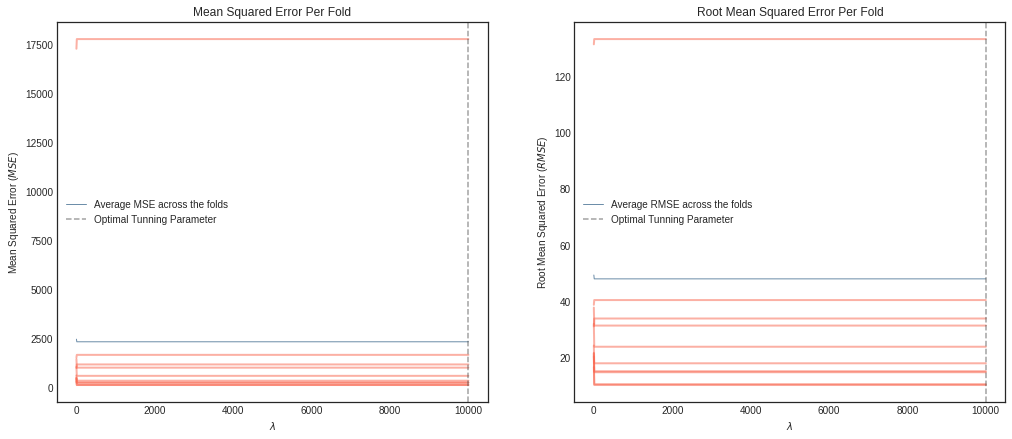



Cross-Validation Ridge
----------------------------------------------------------------------------------------------------
validation R^2: -0.565 | testing R^2: -0.665
validation MSE: 11891.508 | testing MSE: 1383.954
validation RMSE: 109.048 | testing RMSE: 109.048
validation MAE:   23.8 | testing MAE: 16.154



In [454]:
# training and testing error to three significant figures
print('\n\nOrdinary Least Squares')
print('-' * 100)
evaluateFittedModel(LinearRegression,  X_train, y_train, X_validation, y_validation, X_test, y_test, alphas)
print('\n\nCross-Validation Lasso')
print('-' * 100)
evaluateFittedModel(LassoCV,  X_train, y_train, X_validation, y_validation, X_test, y_test, alphas, cv=10, plot_error=True)
print('\n\nCross-Validation Ridge')
print('-' * 100)
evaluateFittedModel(RidgeCV,  X_train, y_train, X_validation, y_validation, X_test, y_test, alphas, cv=5, plot_error=True)

___

**Discussion:**

The low $R^2$ accross all models is telling us that our modeling approach fails to explain any variability of the response data around its mean. However, this does not mean we have a bad model. $R^2$ cannot determine whether the coefficient estimates and predictions are biased -- which is why visualizations are so helpful in evaluating the accuracy of our models. For a more comprehensive explanation of $R^2$ in application, see [here](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit).
    
For $MSE$ note the extremely high values of MSE -- two orders of magnitue larger than MAE. Recall that MSE squares the error terms, sums them, and finally takes the average. Our model may be still have outlier values that are inflating our MSE measure.

$RMSE$ is consistent throughout our models with some differences in the significant figures. RMSE is a reliable way of comparing models, since it indicates the abslute fit of the model to the data while also providing an error metric that is in  the same units as the response variable. RMSE can be thought of as the standard deviation (i.e. unexplained variance). When comparing models, the model with the lowest RMSE tends to be the best.

When it comes to $MAE$, RMSE should always be larger that MAE particularly as sample size increases. MAE is less sensitive to outliers, and commonly used as an evaluation metric when modeling time-dependent data. MAE is less biased than MSE, clearly, but MAE may not reflect the model's performance when dealing with large errors.
        
___

___

## References and Additional Resources
___


<br>

#### METRICS

___

##### **[Residual Sum of Squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares)**

$$\displaystyle{RSS(\beta) = \sum_{i=1}^N \left( y_i - f(x_i) \right) = \sum_{i=1}^N \left(y_i-\beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2}$$

About: 
>* A [residual](https://en.wikipedia.org/wiki/Errors_and_residuals), is equal to the difference between the observed and predicted value. $e_i = y_ - \hat{y}_i$ <br>
>* RSS is a measure of the amount of variance in the data that is not explained by the regression model.<br>
>* RSS seems like a reasonable metic if each trainging observation $(x_i, y_i)$ represents a random draw from the underlying population -- independent, and indentically distributed.<br>
>* If the $x_i~'s$ are not drawn randomly then so long as the $y_i~'s$ are conditionally independent given the inputs $x_i$ then we can assume RSS is still a good metric.<br>
>* RSS seeks to minimize the distance between actual and predicted data. That is, the lower RSS the better the regression model ability to explain the data.<br>

<br>

##### **[Root Mean Squared Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation)**

Consider the [Mean Squared Error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) of an estimator $\tilde{\theta}$ estimating $\theta$. We have

$$\displaystyle{MSE(\tilde{\theta}) = E\left(\tilde{\theta} - \theta\right)^2 = Var\left(\tilde{\theta}\right) + \left[E\left(\tilde{\theta}\right) - \theta\right]^2}$$

Then for $y_i \in \theta$ and $\hat{y}_i \in \hat{\theta}$ for $i=1,2,\dots$


$$\displaystyle{RMSE(\hat{\theta}) = \sqrt{MSE(\hat{\theta})} = \sqrt{E[(\hat{\theta}-\theta)^2]} = \sqrt{\frac{\sum_i(\hat{y}_i - y_i)^2}{n}}}$$


About: 
>* [Gauss-Markok Theorem](https://math.unm.edu/~fletcher/JPG/mch4.pdf) implies that the least squares estimator has the smallest mean square error -- across all linear estimators with no bias. However, there may exist a biased estimator that has a larger reduction in variance.<br>
>* RMSE is the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between the vector of true values and the vector of predicted values, averaged by the square roon of the number of data points.<br>
>* Because RMSE and MSE are an average, they sensitive to large outliers.
>* Because RMSE and MSE are squared, they penalize small errors which leads to over-estimation of poor model performance.
>* RMSE is preferred over MSE when large errors are undesired.

<br>

##### **[Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)**


$$\displaystyle{MAE = \frac{1}{n} \sum_{i=1}^n \left|\hat{y}_i - y_i\right|}$$


About: 
>* MAE is an arithmetic average of the absolute errors $\left|e_i\right|=\left|\hat{y}_-y_i\right|$ where $\hat{y}_i$ is the prediction and $y_i$ is the actual value.<br>
>* MAE uses same scale as date being measured. As such it cannot be used to compare between different scales.<br>
>* MAE is a common measure of forecast error in time series analysis.

<br>

##### **[Coefficient of Determination ($R^2$)](https://en.wikipedia.org/wiki/Coefficient_of_determination)**

Let $e_i = y_i - f(x_i)$ be a vector of residuals. If $\bar{y}$ is the mean of the observed data

$$\displaystyle{\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i}$$

Then the variablity of the data is captured by the [Residual Sum of Squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares) and the [Total Sum of Squares (SST)](https://en.wikipedia.org/wiki/Total_sum_of_squares). Namely,

$$\displaystyle{RSS =\sum_{i=1}^n \left(y_i - f(x_i)\right)^2 = \sum_{i=1}^n(y_i - \hat{y}_i)^2}$$ <br>

$$\displaystyle{SST = \sum_i \left(y_i - \bar{y}\right)^2}$$

Then the [coefficient of determination](https://youtu.be/xxFYro8QuXA) is given by 


$$\displaystyle{R^2 = 1- \frac{SSR}{SST} = 1-\frac{\sum_{i=1}^n(y_i -\hat{y}_i)^2}{\sum_{i=1}^n (y_i-\bar{y}_i)^2}}$$


About: 
>* $R^2$ is a highly interpretable, scale free, score that is always less than or equal to 1, that provides a meassure for how well the regression predictions approximate the real data points.<br>
>* $R^2$ of 1 implies that the predictions perfectly fit the data, while $R^2=0$ implies no linear relationship between the dependent and independent variables..<br>
>* When expressed as a percentage, $R^2$ gives the percentage of total sum of squares that can be explained using the regression equation.
>* A negative $R^2$ score, $-\infty<R^2<0$, may be due to: (1) Choosing an incorrect model that does not fit the data (numerator high); (2) There is a high number of large outlier data points causing bloating of the denominator; (3) A missing intercept, which serves as the baseline when tracking the dependent variable (seen as a large nominator).  
>* Values of $R^2$ between 0 and 1, $0\le R^2\le1$, occur when the model fist the data worse than a horizontal hyperplane.  This is indicative of either using an incorrect model or the existance of non-sensical constraints.<br> 
>* One possible drawback for using $R^2$ is that $R^2$ [increases monotonically](https://en.wikipedia.org/wiki/Monotonic_function) with the number of features. A [kitchen sink regression](https://en.wikipedia.org/wiki/Kitchen_sink_regression) can become a tempting approach for incraseing $R^2$.
>* An alternate to $R^2$ is [$adjusted~ R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2), which essentially the same as $R^2$ but with a penalty added as more variables are included in the model.

<br>

**Note:** If $X_{n \times p}$ is the feature vector and $rank(X) = p$ then for a given n-vector of responses $y$, $RSS(\beta)$ is given by 

<br>

$$\displaystyle{\min_{\beta \in \mathbb{R}^n} RSS(\beta) = \hat{\beta} \left(X^TX\right)^{-1} X^Ty }$$

<br>

##### **[Quantiles of Error](https://en.wikipedia.org/wiki/Quantile_regression)**

Quantiles (aka percentiles) are a metric that is less susceptible to large outliers. Which percentile to use as an evaluation metric will depend on the problem. In general the [Median Absolute Percentage Error (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) is a good quantile to begin with. 

$$\displaystyle{MAPE = median\left(\left|\frac{\hat{y}_i - y_i}{y_i}\right|\right)}$$


About: 
>* MAPE gives a relative measure for error. For example computing the 90th percentile of the absolute percent error would give an indication of "almost worst case" behavior.

<br>

[**Variance Inflation Factors (VIF)**](https://en.wikipedia.org/wiki/Variance_inflation_factor) is a metric that gives us a feature's individual cotribution to total variance.

$$\displaystyle{ VIF_i = \frac{1}{1-R^2_i} }$$

About:
>* $VIF > 10$ --> definetly a problem with that feature<br>
>* $VIF > ~~5$  --> there may be a problem with the feature<br>
>* $VIF \le ~~5$ --> the feature is, probably, ok<br>

>* To deal with multicollinearity you can drop variables with high VIF. 
>* If more tha one variable have similar VIF values, keep the one you like.
>* Repeat iteratively (meaning recalculate VIF values and see if high VIF values remain).

___

<br>

#### Install Python Development Environment

<br>

**Install/Update pip3**

https://pip.pypa.io/en/stable/installing/

```bash
    # TensorFlow requires pip version >= 19.0
    $ pip install --upgrade pip 
```

<br>

**Install/Update Python 3**

https://www.python.org/downloads/

```bash
    # TensorFlow requires Python 3.5-3.8 
    $ sudo apt-get update && sudo apt-get install python3-dev python3-pip python3-venv python-virtualenv
```

___

<br>

#### Create The Validation Curve Plot

Based on: https://stats.stackexchange.com/users/192854/xavier-bourret-sicotte

In [287]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

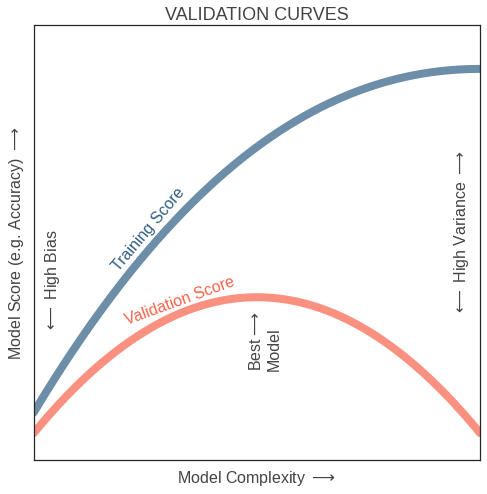

In [288]:
# create data
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

#create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# plot artists (curves)
ax.plot(x, y2, lw=8, alpha=0.7, color='#2F5E85')
ax.plot(x, y1, lw=8, alpha=0.7, color='#F9634B')

# add text to figure
ax.text(0.17, 0.05, "Training Score", rotation=50, size=16, color='#2F5E85')
ax.text(0.2, -0.05, "Validation Score", rotation=20, size=16, color='#F9634B')

ax.text(0.02, 0.03, r'$\longleftarrow$ High Bias', size=16, rotation=90, va='center', color="#434343")
ax.text(0.98, 0.12, r'$\longleftarrow$ High Variance $\longrightarrow$', size=16, rotation=90, ha='right', va='center', color="#434343")
ax.text(0.48, -0.08, 'Best$\\longrightarrow$\nModel', size=16, rotation=90, va='center', color="#434343")

# modify axes limits
ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

# create artist labels
ax.set_xlabel(r'Model Complexity $\longrightarrow$', size=16, color="#434343")
ax.set_ylabel(r'Model Score (e.g. Accuracy) $\longrightarrow$', size=16, color="#434343")

# set formating on major ticker
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

# header
ax.set_title("VALIDATION CURVES", size=18, color="#434343")
# save image
fig.savefig('validation_curve.png')

___

<br>

#### Create The Learning Curve Plot

Based on: https://stats.stackexchange.com/users/192854/xavier-bourret-sicotte

In [289]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

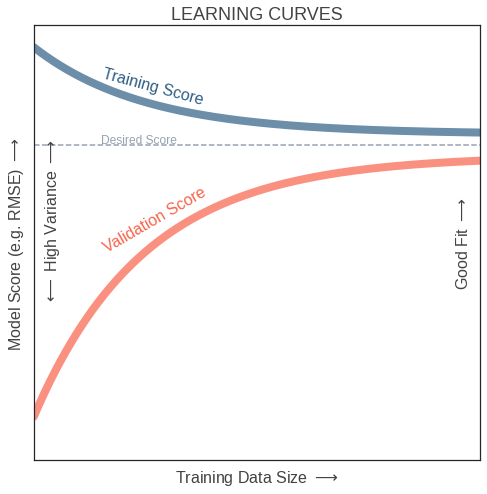

In [290]:
# create data
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

#create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# plot artists (curves)
ax.plot(x, y1, lw=8, alpha=0.7, color='#2F5E85')
ax.plot(x, y2, lw=8, alpha=0.7, color='#F9634B')

# plot artist (horizontal line) -- Desired Accuracy
ax.axhline(y=.725, color="#96A3B0", linestyle='--')

# add text to figure
ax.text(0.15, 0.82, "Training Score", rotation=-15, size=16, color='#2F5E85')
ax.text(0.15, 0.48, "Validation Score", rotation=30, size=16, color='#F9634B')
ax.text(0.15, 0.73, "Desired Score", rotation=0, size=12, color='#96A3B0')

ax.text(0.98, 0.5, r'Good Fit $\longrightarrow$', size=16, rotation=90, ha='right', va='center', color="#434343")
ax.text(0.02, 0.55, r'$\longleftarrow$ High Variance $\longrightarrow$', size=16, rotation=90, va='center', color="#434343")

# modify axes limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# create artist labels
ax.set_xlabel(r'Training Data Size $\longrightarrow$', size=16, color="#434343")
ax.set_ylabel(r'Model Score (e.g. RMSE) $\longrightarrow$', size=16, color="#434343")

# set formating on major ticker
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

# header
ax.set_title("LEARNING CURVES", size=18, color="#434343")

# save image
fig.savefig('learning_curve.png')

___

<br>

#### Visualize OLS, L1, L2, and Solution Paths

Based on: https://stats.stackexchange.com/users/192854/xavier-bourret-sicotte

In [438]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn-white')

<br>

**Simulate dataset**

In [4]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

<br>

**Helper Functions**

In [5]:
def costfunction(X,y,theta):
    '''OLS cost function'''
    #Initialisation of useful values 
    m = np.size(y)
    
    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return (J);

def closed_form_solution(X,y):
    '''Linear regression closed form solution'''
    return (np.linalg.inv(X.T @ X) @ X.T @ y)
    
def closed_form_reg_solution(X,y,lamda = 10): 
    '''Ridge regression closed form solution'''
    m,n = X.shape
    I = np.eye((n))
    return ((np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:,0])

def cost_l1(x,y):
    '''Lasso (L1) cost function'''
    return (np.abs(x) + np.abs(y))

def cost_l2(x,y):
    '''Ridge (L2) cost functiom'''
    return (x**2 + y**2)

<br>

**Compute Closed Form Solutions as Functions of $\lambda$**

In [6]:
# Lasso
lambda_range = np.logspace(0,5,num = 400)/4000
theta_0_list_reg_l1 = []
theta_1_list_reg_l1 = []

for l in lambda_range:
    model_sk_reg = linear_model.Lasso(alpha=l, fit_intercept=False)
    model_sk_reg.fit(X,y_noise)
    t0, t1 = model_sk_reg.coef_
    theta_0_list_reg_l1.append(t0)
    theta_1_list_reg_l1.append(t1)

In [7]:
# Ridge
lambda_range = np.logspace(0,5,num = 200)/2000
theta_0_list_reg_l2 = []
theta_1_list_reg_l2 = []

for l in lambda_range:
    t0, t1 = closed_form_reg_solution(X,y_noise,l)
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)

<br>

**Plot Contour Plots and L1, L2 Paths**

/home/ehch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


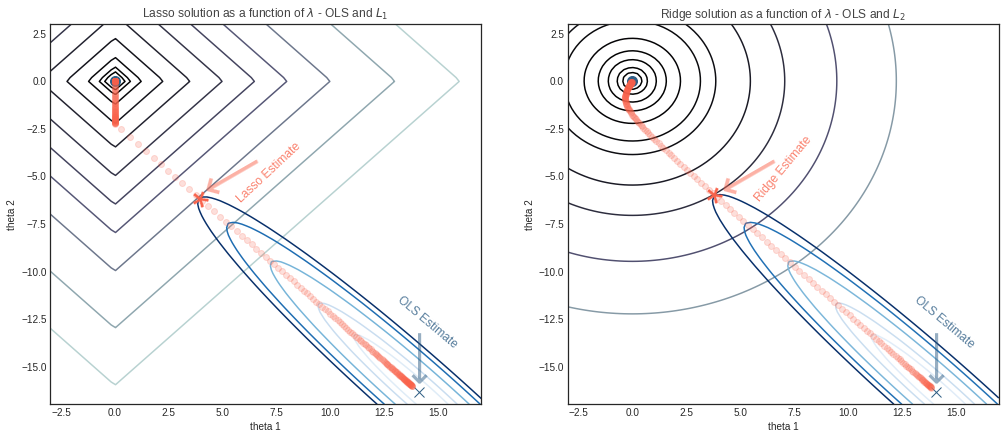

In [55]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-3,17,100),np.linspace(-17,3,100))

#Computing the cost function for each theta combination
zz_l2 = np.array(  [cost_l2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T@X)@X.T@y_noise
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

# setting figure and axes
fig = plt.figure(figsize = (17,7))
ax = fig.add_subplot(1, 2, 1)

##################### LASSO #####################
#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l1, levels = [.5,.75,1.25,2.25,3.5,5,6.5,8,10,13,16,20],  cmap = 'bone')
ax.contour(xx, yy, Z_ls, levels = [.05,.06,.07,.09,.115,.135], cmap = 'Blues')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ', color = '#434343')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = '#2F5E85', markersize = 10)
ax.plot(0,0, marker = 'o', color = '#2F5E85', markersize = 10)

#Plotting the path of L1 regularized minimum
ax.plot(theta_0_list_reg_l1,theta_1_list_reg_l1, linestyle = 'none', marker = 'o', color = '#F9634B', alpha = .2)

# add text to figure OLS contour
ax.text(13.00, -14.00, "OLS Estimate", rotation=-40, size=12, color="#2F5E85", alpha=.8)
ax.text(14.90, -14.30, r'$\longrightarrow$', size=38, rotation=-90, ha='right', va='center', alpha=.5, color="#2F5E85")

# add text to lasso contour
ax.text(5.55, -6.35, "Lasso Estimate", rotation=43, size=12, color="#F9634B", alpha=.8)
ax.text(3.35, -7.10, "*", rotation=50, size=44, color="#F9634B", alpha=1)
ax.text(7.5, -4.70, r'$\longrightarrow$', size=44, rotation=210, ha='right', va='center', alpha=.5, color="#F9634B")
##################### LASSO #####################

##################### RIDGE #####################
#Plotting the contours - L2 
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l2, levels = [.2,.5,1.25,2.5,5,10,15,30,50,90,150,250],  cmap = 'bone')
ax.contour(xx, yy, Z_ls, levels = [.05,.06,.07,.09,.115,.137], cmap = 'Blues')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ', color = '#434343')

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = '#2F5E85', markersize = 10)
ax.plot(0,0, marker = 'o', color = '#2F5E85', markersize = 10)

#Plotting the path of L2 regularized minimum
ax.plot(theta_0_list_reg_l2,theta_1_list_reg_l2, linestyle = 'none', marker = 'o', color = '#F9634B', alpha = .2)

# add text to figure OLS contour
ax.text(13.00, -14.00, "OLS Estimate", rotation=-40, size=12, color="#2F5E85", alpha=.8)
ax.text(14.90, -14.30, r'$\longrightarrow$', size=38, rotation=-90, ha='right', va='center', alpha=.5, color="#2F5E85")

# add text to Ridge contour
ax.text(5.60, -6.30, "Ridge Estimate", rotation=50, size=12, color="#F9634B", alpha=.8)
ax.text(3.20, -6.90, "*", rotation=50, size=44, color="#F9634B", alpha=1)
ax.text(7.5, -4.70, r'$\longrightarrow$', size=44, rotation=210, ha='right', va='center', alpha=.5, color="#F9634B")
##################### RIDGE #####################

# save image
fig.savefig('l1_l2_contour_detailed.png')

plt.show()

___

## Additional Content and Sources

> [Elements of Statistical Learnig by Trevor Hastie, Robert Tirnshirani, and Jerome Friedman](https://web.stanford.edu/~hastie/ElemStatLearn/)<br>
> [Evaluating Machine Learning Models - AWS Developer's Guide](https://docs.aws.amazon.com/machine-learning/latest/dg/evaluating_models.html)<br>
> [Machine Learning Crash Course - Google Machine Developer's Guide](https://developers.google.com/machine-learning/crash-course)<br>
> [Evaluating Machine Learning Models by O'Reilley](https://www.oreilly.com/content/evaluating-machine-learning-models/)<br>
> [DATA BLOG by Xavier Bourret Sicotte](https://xavierbourretsicotte.github.io/)<br>
> [Model Tuning by David Ziganto](https://dziganto.github.io/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-Train-Test-Split/)<br>
> [Machine Learning for Operations Research & Financial Engineering by Martin Haugh](https://martin-haugh.github.io/teaching/ml-orfe/)<br>
> [Forest Firre Impact Prediction (Stats and ML) by Vishnu and Koutharapu](https://www.kaggle.com/psvishnu/forestfire-impact-prediction-stats-and-ml)<br>
> [Nuts and Bolts of Building Applications using Deep Learning](https://youtu.be/F1ka6a13S9I)<br>


<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="DataX_icon_wide_logo.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___